# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [173]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 


#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [174]:
data =pd.read_csv('weight-height.csv' )
male_df = data[data.Gender=='Male']
female_df = data[data.Gender=='Female']
#surveys_df[surveys_df.year != 2002]
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
print ('Male Height mean: ',  male_df.Height.mean())
print ('Male Height sd: ',  male_df.Height.std())
print ('Male Weight mean: ',  male_df.Weight.mean())
print ('Male Weight sd: ',  male_df.Height.std())
print ('Female Height mean: ',  female_df.Height.mean())
print ('Female Height sd: ',  female_df.Height.std())
print ('Female Weight mean: ',  female_df.Weight.mean())
print ('Female Weight sd: ',  female_df.Height.std())

Male Height mean:  69.02634590621737
Male Height sd:  2.8633622286606517
Male Weight mean:  187.0206206581929
Male Weight sd:  2.8633622286606517
Female Height mean:  63.708773603424916
Female Height sd:  2.696284015765056
Female Weight mean:  135.8600930074687
Female Weight sd:  2.696284015765056


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([array([0.00000000e+00, 8.08550943e-05, 2.82992830e-03, 1.63327290e-02,
         5.93476392e-02, 1.27993614e-01, 1.21120931e-01, 6.14498717e-02,
         1.31793804e-02, 1.94052226e-03]),
  array([0.00185967, 0.01754556, 0.07204189, 0.13777708, 0.11821015,
         0.04721938, 0.00921748, 0.00040428, 0.        , 0.        ])],
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <a list of 2 Lists of Patches objects>)

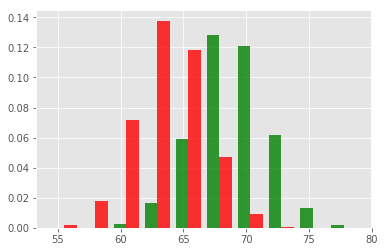

In [196]:
#plt.hist(male_df.Height, 20, alpha = 0.5, normal=True, color="k")
#plt.hist(female_df.Height, 20, alpha = 0.5, normal=True)

plt.hist([male_df.Height, female_df.Height], color=['g','r'], alpha=0.8, bins=10, normed=True)


C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


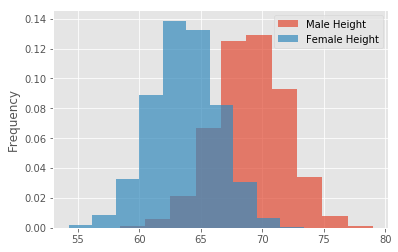

In [197]:
# Record your observations - are these inline with your personal observations?

# My observation is women are usually shorter that men. So yes, the charts inline with my personal experience. 

binsize = 10
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
plt.show()

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

[-0.2859688  -0.23306421 -0.18015961 -0.12725502 -0.07435043 -0.02144584
  0.03145875  0.08436334  0.13726794  0.19017253  0.24307712]


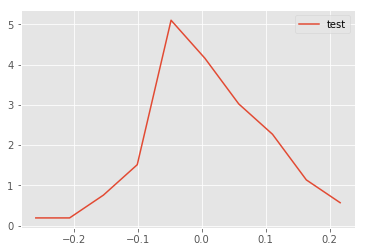

In [198]:
def density(dt):
    n, bins = np.histogram(dt, 10, density=1)
    bins
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    print (bins)
   # print(dt)
# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx , pdfy    




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

[58.40690493 60.46608867 62.52527241 64.58445616 66.6436399  68.70282364
 70.76200738 72.82119112 74.88037486 76.9395586  78.99874235]
[54.26313333 56.17577858 58.08842383 60.00106909 61.91371434 63.8263596
 65.73900485 67.6516501  69.56429536 71.47694061 73.38958587]


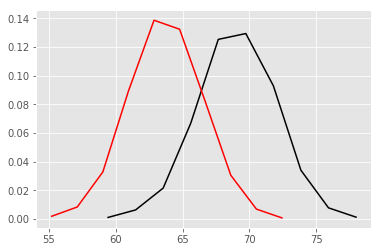

In [199]:
x,y = density(male_df.Height)
x2,y2 = density(female_df.Height)
plt.plot(x,y, color="k")
plt.plot(x2,y2, color="r")
#plt.hist(female_df.Height, 20, alpha = 0.5, normal=True)

[58.40690493 60.46608867 62.52527241 64.58445616 66.6436399  68.70282364
 70.76200738 72.82119112 74.88037486 76.9395586  78.99874235]
[54.26313333 56.17577858 58.08842383 60.00106909 61.91371434 63.8263596
 65.73900485 67.6516501  69.56429536 71.47694061 73.38958587]


C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


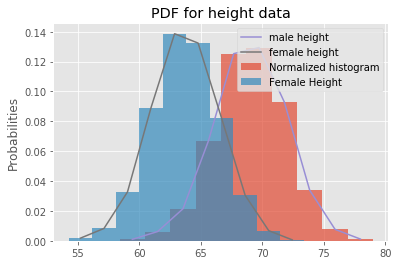

In [200]:
pdfx, pdfy= density(male_df.Height)
male_df.Height.plot.hist(bins = 10, normed=True, label = 'Normalized histogram', alpha = 0.7)
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Female Height');

# plot the calculated curve
#plt.plot(pdfx, pdfy, label = 'Density function')

plt.plot(pdfx,pdfy , label="male height")

pdfx, pdfy= density(female_df.Height)
plt.plot(pdfx,pdfy , label="female height")


plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()


#### Repeat above exerice for male and female weights

C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[ 64.70012671  78.45383542  92.20754412 105.96125282 119.71496152
 133.46867023 147.22237893 160.97608763 174.72979633 188.48350504
 202.23721374]
[112.90293945 128.61161535 144.32029126 160.02896717 175.73764307
 191.44631898 207.15499488 222.86367079 238.57234669 254.2810226
 269.98969851]


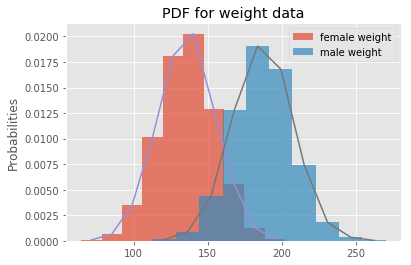

In [201]:
# Your code here 
female_df.Weight.plot.hist(bins=10, normed= True, label="female weight", alpha=0.7)
male_df.Weight.plot.hist(bins=10, normed= True, label="male weight", alpha = 0.7)

pdfx, pdfy = density(female_df.Weight)
plt.plot(pdfx,pdfy )

pdfx, pdfy = density(male_df.Weight)
plt.plot(pdfx,pdfy)



plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for weight data')
plt.show()



#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
# the result is aligned with my observation. Males weght more than femails. 


# So whats the takeaway when comparing male and female heights and weights 
#From these two charts, I can say that, the difference between weights are more than difference between hights among different gender.  


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

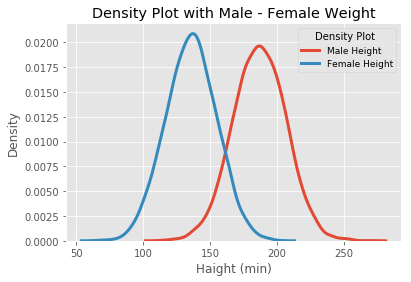

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.distplot(male_df.Weight, hist = False, kde = True,
             kde_kws = {'linewidth': 3},
                label = 'Male Height')
sns.distplot(female_df.Weight, hist = False, kde = True,
             kde_kws = {'linewidth': 3},
                label = 'Female Height')
    
# Plot formatting
plt.legend(prop={'size': 9}, title = 'Density Plot ')
plt.title('Density Plot with Male - Female Weight')
plt.xlabel('Haight (min)')
plt.ylabel('Density')



C:\Users\p00129197\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


Text(0,0.5,'Density')

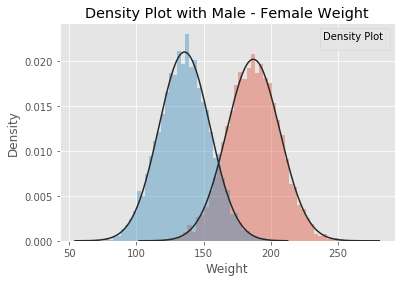

In [208]:
from scipy.stats import norm
ax = sns.distplot(male_df.Weight, fit=norm, kde=False)
ax2=sns.distplot(female_df.Weight, fit=norm, kde=False)
plt.legend(prop={'size': 9}, title = 'Density Plot ')
plt.title('Density Plot with Male - Female Weight')
plt.xlabel('Weight')
plt.ylabel('Density')


In [ ]:
# Your comments on the two approaches here. 
#seaborn does not need the density function. So it is quicker.


# are they similar ? what makes them different if they are ?

#they are similar but not same.  seaborn results seems more smooth. That means it uses smaller bins to get more accurate density curve.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.